# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kelsey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
C:\Users\Kelsey\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api_key")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q = "bitcoin", language = "en")
btc_news["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Paul Ford',
 'title': 'A Field Guide for Nature-Resistant Nerds',
 'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
 'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
 'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
 'publishedAt': '2021-08-06T11:00:00Z',
 'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'}

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q = "ethereum", language = "en")
eth_news["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Tenderly raises $15.3M to help Ethereum developers ship decentralized apps faster',
 'description': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto space in 2021. The latest crypto startup to court the attenti…',
 'url': 'http://techcrunch.com/2021/07/29/tenderly-raises-15-3m-to-help-ethereum-developers-ship-decentralized-apps-faster/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/07/Tenderly-Founding-Team-1.jpg?w=600',
 'publishedAt': '2021-07-29T18:27:16Z',
 'content': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass

btc_df = pd.DataFrame(Bitcoin_sentiments)

In [7]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    

eth_df = pd.DataFrame(Ethereum_sentiments)


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.076110,0.040100,0.904750,0.055150
std,0.461373,0.069485,0.071752,0.061532
min,-0.886000,0.000000,0.729000,0.000000
25%,-0.307000,0.000000,0.860500,0.000000
50%,0.000000,0.000000,0.908000,0.026000
75%,0.498075,0.076250,0.954250,0.103750
max,0.680800,0.271000,1.000000,0.157000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.075400,0.015300,0.94395,0.040700
std,0.306664,0.031872,0.06275,0.061063
min,-0.440400,0.000000,0.81000,0.000000
25%,0.000000,0.000000,0.91450,0.000000
50%,0.000000,0.000000,0.94800,0.000000
75%,0.243725,0.000000,1.00000,0.059000
max,0.695600,0.094000,1.00000,0.190000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin at .04

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()


# Create a list of stopwords
stop = stopwords.words('english')


# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append("_")
stop.append("\`")
stop.append("``")
stop.append("''''")
stop = set(stop)

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[wnl.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    # Remove the punctuation from text

   
    # Create a tokenized list of the words
    
    
    # Lemmatize words into root words

   
    # Convert the words to lowercase
    
    
    # Remove the stop words
    
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df.Text.apply(tokenizer)
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,-0.3400,0.061,0.939,0.000,When my wife started a little garden in our ur...,"[wife, started, little, garden, urban, backyar..."
1,0.4019,0.000,0.920,0.080,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,"[photo, joe, raedlegetty, images, twitter, squ..."
2,0.6187,0.000,0.847,0.153,Retailers are increasingly accepting cryptocur...,"[retailers, increasingly, accepting, cryptocur..."
3,-0.8860,0.271,0.729,0.000,"By Joe TidyCyber reporter \r\n""Follow the mone...","[joe, tidycyber, reporter, follow, money, gene..."
4,0.6240,0.000,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...,"[get, roundup, techcrunchs, biggest, important..."


In [14]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.Text.apply(tokenizer)
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,-0.2411,0.061,0.939,0.000,Blockchain infrastructure startups are heating...,"[blockchain, infrastructure, startup, heating,..."
1,0.6956,0.000,0.810,0.190,Cent was founded in 2017 as an ad-free creator...,"[cent, wa, founded, adfree, creator, network, ..."
2,0.5719,0.000,0.861,0.139,"After the bell today, Coinbase reported anothe...","[bell, today, coinbase, reported, another, per..."
3,0.0000,0.000,1.000,0.000,Representation of the Ethereum virtual currenc...,"[representation, ethereum, virtual, currency, ..."
4,0.0000,0.000,1.000,0.000,"HONG KONG, Aug 5 (Reuters) - Ether held near t...","[hong, kong, aug, reuters, ether, held, near, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_gram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.tokens]
dict(btc_gram_counts[0].most_common(10))


{('wife', 'started'): 1,
 ('started', 'little'): 1,
 ('little', 'garden'): 1,
 ('garden', 'urban'): 1,
 ('urban', 'backyard'): 1,
 ('backyard', 'could'): 1,
 ('could', 'think'): 1,
 ('think', 'worm'): 1,
 ('worm', 'also'): 1,
 ('also', 'bug'): 1}

In [19]:
# Generate the Ethereum N-grams where N=2
eth_gram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.tokens]
dict(eth_gram_counts[0].most_common(10))

{('blockchain', 'infrastructure'): 1,
 ('infrastructure', 'startup'): 1,
 ('startup', 'heating'): 1,
 ('heating', 'industry'): 1,
 ('industry', 'fervor'): 1,
 ('fervor', 'brings'): 1,
 ('brings', 'developer'): 1,
 ('developer', 'user'): 1,
 ('user', 'space'): 1,
 ('space', 'still'): 1}

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
btcstr = []
for tokens in btc_df.tokens:
    btcstr += tokens
btc_token_count = token_count(btcstr)
btc_token_count

[('char', 20),
 ('bitcoin', 10),
 ('reuters', 7),
 ('july', 5),
 ('seen', 5),
 ('illustration', 5),
 ('taken', 5),
 ('reutersdado', 5),
 ('cryptocurrency', 4),
 ('data', 4)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
ethstr = []
for tokens in eth_df.tokens:
    ethstr += tokens
eth_token_count = token_count(ethstr)
eth_token_count

[('char', 20),
 ('ethereum', 14),
 ('ha', 7),
 ('reuters', 5),
 ('ether', 5),
 ('blockchain', 4),
 ('network', 4),
 ('pc', 4),
 ('motherboard', 4),
 ('illustration', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

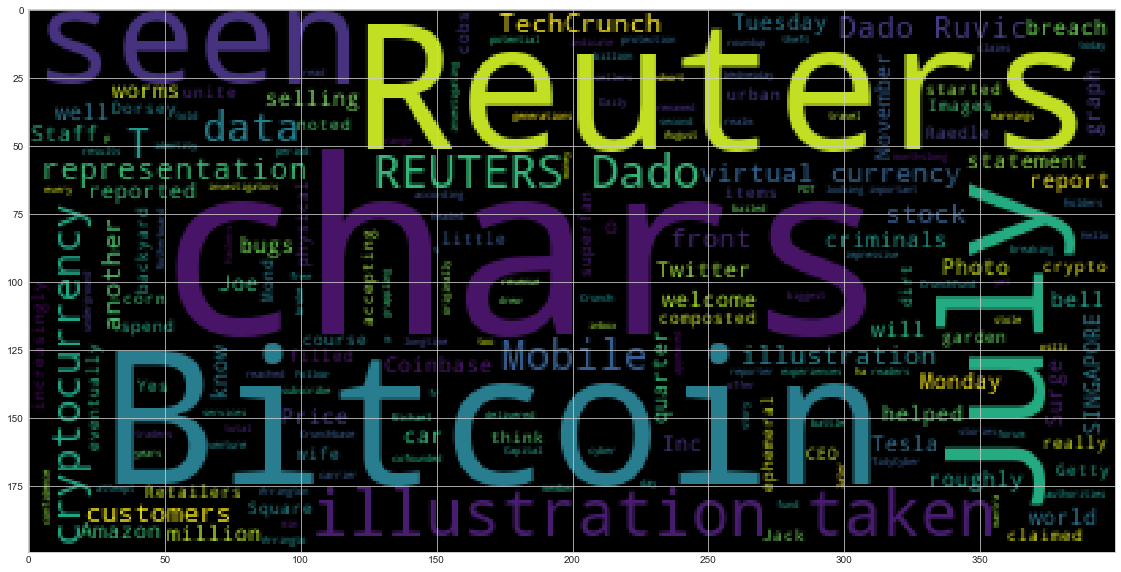

In [28]:
# Generate the Bitcoin word cloud
btc_big_string = ' '.join(btc_df['Text'])
btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

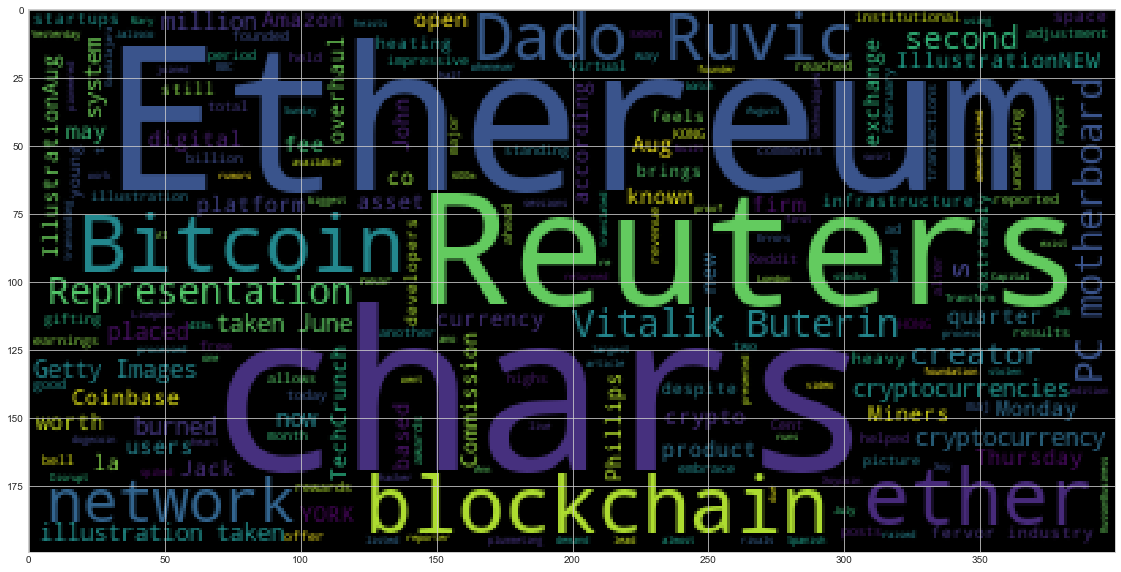

In [29]:
# Generate the Ethereum word cloud
eth_big_string = ' '.join(eth_df['Text'])


eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [43]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [44]:
# Concatenate all of the Bitcoin text together
btc_big_string

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars] Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars] Retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars] By Joe TidyCyber reporter \r\n"Follow the money" - for generations it\'s been the mantra of investigators looking for criminals.\r\nIn the cyber-realm, this battle between criminals and the authorities ha… [+3786 chars] To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe

In [45]:
# Run the NER processor on all of the text
bitcoin = nlp(btc_big_string)

# Add a title to the document
bitcoin.user_data['title'] = 'Bitcoin NER'

In [46]:
# Render the visualization
displacy.render(bitcoin, style = 'ent')

In [47]:
# List all Entities
print(bitcoin.ents)

(Joe Raedle, Twitter, Square, Jack Dorsey, Monday, Joe TidyCyber, every day, 3 p.m. PDT, Daily Crunch, July 23, 2021, two years, roughly 49 million, Michael Arrington, TechCrunch, Crunchbase, CrunchFund, Tuesday, 2017, today, Coinbase, its second quarter, the quarter, Coinbase, $2.23 billion, SINGAPORE, July 28, Reuters, 40,000, Wednesday, Motherboard, August, 20, 2021, PennyStocksBitcoin Price Surge Helped Boost, Bitcoin, Dogecoin, Ethereum, T-Mobile, Roughly 47.8 million, June 7, 2021, REUTERS, Edgar Su/IllustrationAug, Reuters, 7.07%, 47,587.38, 2200, James Martin/CNET, UK, Spain, Twitter, 2020, the US Department of Justi, November 19, 2020, REUTERS, Dado Ruvic/IllustrationSINGAPORE, July 21, Reuters, Reuters, FILE, November 19, 2020, REUTERS, Dado Ruvic/Illustration
SINGAPORE, REUTERS, Dado Ruvic/Illustration
Welcome, 10, the Opening Bell, first, February 9, 2021, REUTERS, Dado, Reuters, Tesla Inc, LONDON, July 20, Reuters, Tuesday, almost a month, 30,000, Reuters, July 13, 2021, R

---

### Ethereum NER

In [48]:
# Concatenate all of the Ethereum text together
eth_big_string

"Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars] Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars] After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.\r\nDuring the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars] Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/IllustrationNEW YORK, Aug 5 (Reuters) - A maj… [+439 chars] HONG KONG, Aug 5 (Reuters) - Ether held near two-month highs on Thursday ahead of a major adjustment to its underlying ethereum blockchain

In [49]:
# Run the NER processor on all of the text
ethereum = nlp(eth_big_string)

# Add a title to the document
ethereum.user_data['title'] = 'Ethereum NER'

In [50]:
# Render the visualization
displacy.render(ethereum, style = 'ent')

In [51]:
# List all Entities
print(ethereum.ents)

(2017, Reddit, Ethereum, today, Coinbase, its second quarter, the quarter, Coinbase, $2.23 billion, Ethereum, February 3, 2018, REUTERS, Dado Ruvic, Aug 5, Reuters, HONG KONG, Aug 5, Reuters, two-month, Thursday, Ethereum, June 29, 2021, REUTERS, Dado Ruvic/IllustrationAug 3, Reuters, Ethereum, Monday, Amazon, Amazon, Vitalik Buterin, TechCrunch Disrupt London 2015, John Phillips, Vitalik Buterin, BBC News, almost half, $600m, 433, Yesterday, Ethereum, June 29, 2021, REUTERS, Dado Ruvic, July 30, Reuters, second, More than $144 million, August 5, Sunday, over 45,799, second, Dado Ruvic, Reuters, More than $144 million, Livepeer, $20 million, Ethereum, Spanish, AI, Xoy Capital, Guadalajara, Jalisco, Xoycoin, Ethereum, Jack Taylor/Getty Images
Investment, VanEck, Ethereum, the US Securities and Exchange Commission, Wednesday, Monday, Chicago Bulls, American Express, Vitalik Buterin, John Phillips/, Vitalik Buterin, Thursday, Jack Dorsey, Mark Zuckerberg's, Ethereum, June 29, 2021, REUTER

---